<a href="https://colab.research.google.com/github/Agil0509/Machine-Learning/blob/main/California_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usual method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 27.2MB/s]


In [3]:
!unzip '/content/california-housing-prices.zip'

Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


In [4]:
housing = pd.read_csv('/content/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [8]:
X = housing.drop('median_income',axis = 1)
y = housing['median_income'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
cat_features = X_train.select_dtypes(exclude=[np.number]).columns
num_features = X_train.select_dtypes(include=[np.number]).columns
num_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value'],
      dtype='object')

In [10]:
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

transformer = ColumnTransformer([
    ('num',num_pipeline, ['total_bedrooms']),
    ('cat',cat_pipeline,cat_features)
], remainder = 'passthrough')

In [11]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

columns_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = columns_names)
X
X_train_transformed_df

,num__total_bedrooms,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__population,remainder__households,remainder__median_house_value
0,627.0,0.0,0.0,0.0,0.0,1.0,-117.03,32.71,33.0,3126.0,2300.0,623.0,103000.0
1,787.0,0.0,0.0,0.0,0.0,1.0,-118.16,33.77,49.0,3382.0,1314.0,756.0,382100.0
2,331.0,0.0,0.0,0.0,0.0,1.0,-120.48,34.66,4.0,1897.0,915.0,336.0,172600.0
3,367.0,0.0,0.0,0.0,0.0,1.0,-117.11,32.69,36.0,1421.0,1418.0,355.0,93400.0
4,431.0,0.0,1.0,0.0,0.0,0.0,-119.80,36.78,43.0,2382.0,874.0,380.0,96500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,201.0,1.0,0.0,0.0,0.0,0.0,-117.96,33.78,35.0,1330.0,658.0,217.0,229200.0
16508,570.0,0.0,1.0,0.0,0.0,0.0,-117.43,34.02,33.0,3084.0,1753.0,449.0,97800.0
16509,569.0,1.0,0.0,0.0,0.0,0.0,-118.38,34.03,36.0,2101.0,1756.0,527.0,222100.0
16510,597.0,1.0,0.0,0.0,0.0,0.0,-121.96,37.58,15.0,3575.0,1777.0,559.0,283500.0


In [12]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train_transformed_df,y_train)

RandomForestRegressor()

In [13]:
reg.score(X_train_transformed_df,y_train)

0.9684869289866507

In [14]:
reg.score(X_test_transformed,y_test) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


73.89189381048007

# Analysing Data

In [15]:
housing = pd.read_csv('/content/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


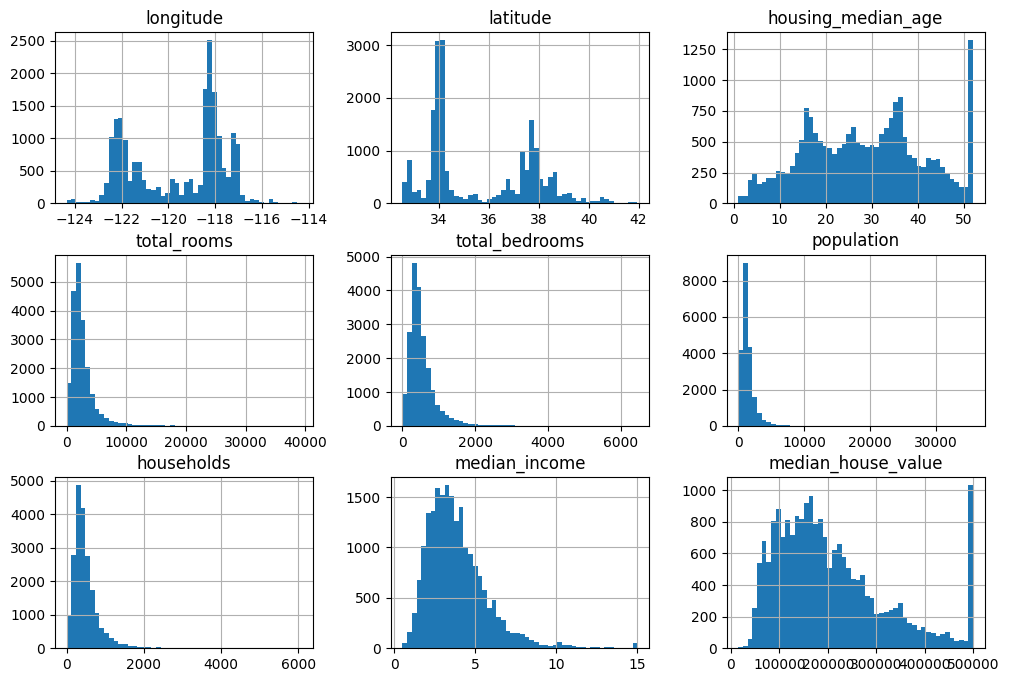

In [16]:
housing.hist(bins = 50, figsize = (12,8));

In [17]:
housing.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


<Axes: >

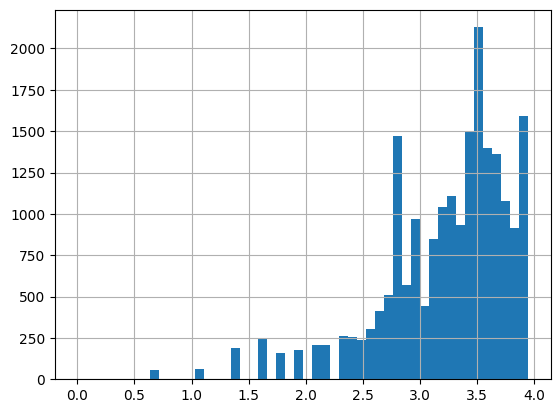

In [18]:
housing['housing_median_age'].apply(np.log).hist(bins = 50)

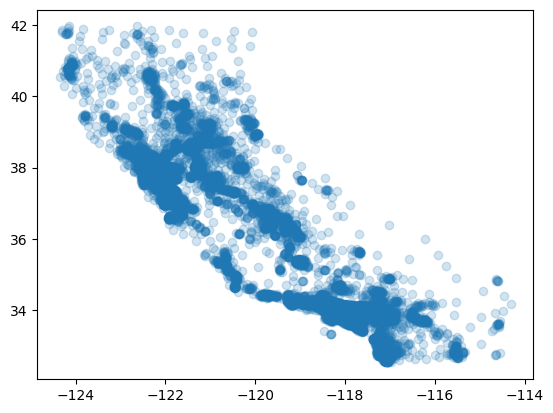

In [19]:
plt.scatter(housing['longitude'],housing['latitude'],alpha = 0.2)

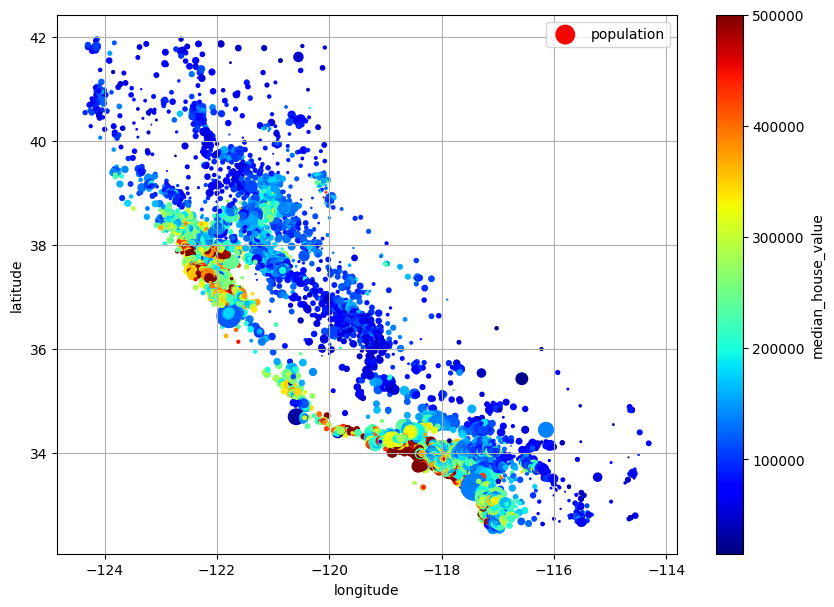

In [20]:
housing.plot(kind = 'scatter',x = 'longitude', y = 'latitude', grid = True,
             s = housing['population']/100, label = 'population',
             c = 'median_house_value',cmap = 'jet', colorbar = True,
             legend = True, figsize = (10,7));

<Axes: >

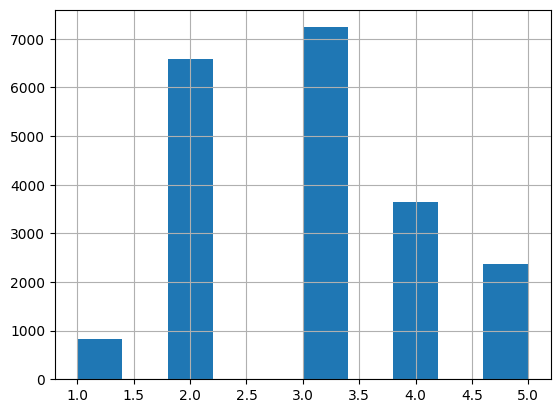

In [21]:
housing['income_cut'] = pd.cut(housing['median_income'],
                               bins = [0,1.5,3.0,4.5,6.0,np.inf],
                               labels = [1,2,3,4,5])
housing['income_cut'].hist()

In [22]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cut',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')

In [24]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, random_state = 42, stratify = housing['income_cut'])

In [25]:
def income_cat_proportion(data):
  return data['income_cut'].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    'Overall %': income_cat_proportion(housing),
    'Stratified %': income_cat_proportion(strat_test_set),
    'Random %': income_cat_proportion(test_set)
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [26]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cut,rooms_per_house,bedrooms_ratio,people_per_house
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5,6.715625,0.156972,2.275000
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4,7.137809,0.151980,3.021201
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3,5.283636,0.185822,2.938182
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3,5.491694,0.196612,3.561462
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3,6.154723,0.162477,2.434853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2,6.108696,0.189947,3.279891
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2,3.138298,0.332203,4.503546
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4,4.974860,0.192027,1.851955
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4,5.026699,0.198938,2.623786


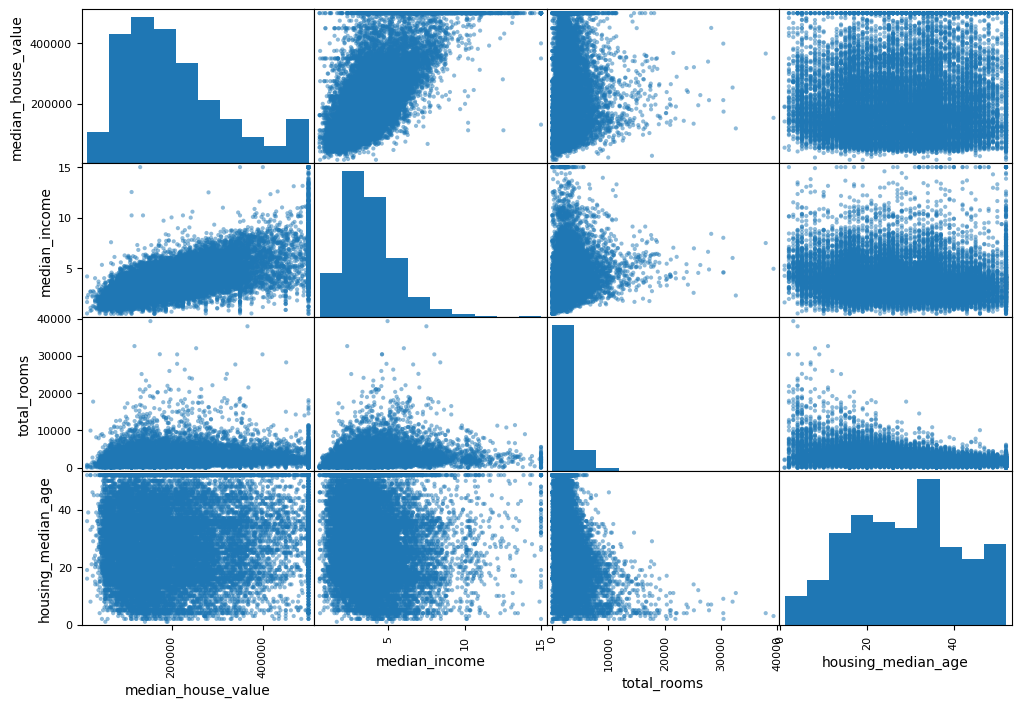

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8));

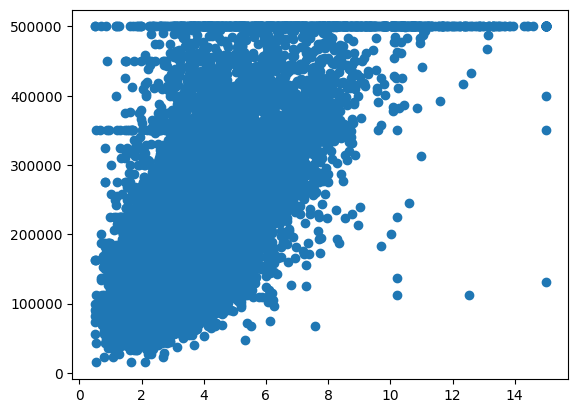

In [28]:
plt.scatter(strat_train_set['median_income'],strat_train_set['median_house_value']);

In [29]:
correlation = strat_train_set.corr(numeric_only = True)
correlation['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_house,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
people_per_house,-0.021991
population,-0.026882
longitude,-0.047466


In [30]:
train_set = strat_train_set.drop('median_house_value', axis = 1)
train_label = strat_train_set['median_house_value']

test_set = strat_test_set.drop('median_house_value', axis = 1)
test_label = strat_test_set['median_house_value']

In [31]:
num_features = train_set.select_dtypes(include = [np.number]).columns
cat_features = ['ocean_proximity']

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy = 'median')),
     ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder())
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [33]:
train_set_transformed = transformer.fit_transform(train_set)
test_set_transformed = transformer.transform(test_set)

column_names = transformer.get_feature_names_out()

train_set_transformed_df = pd.DataFrame(train_set_transformed, columns = column_names)
test_set_transformed_df = pd.DataFrame(test_set_transformed, columns = column_names)
train_set_transformed_df

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,num__rooms_per_house,num__bedrooms_ratio,num__people_per_house,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__income_cut
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,-0.122484,0.006223,0.0,1.0,0.0,0.0,0.0,2.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.911663,-0.040811,0.0,0.0,0.0,0.0,1.0,5.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.370939,-0.075371,0.0,1.0,0.0,0.0,0.0,2.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,1.115873,-0.106803,0.0,0.0,0.0,0.0,1.0,2.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,-0.526821,0.006109,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.491732,-0.092580,1.0,0.0,0.0,0.0,0.0,4.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,-0.574363,0.023024,0.0,1.0,0.0,0.0,0.0,2.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,0.385514,-0.037436,1.0,0.0,0.0,0.0,0.0,3.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.506808,-0.059156,1.0,0.0,0.0,0.0,0.0,3.0


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_set_transformed_df,train_label)

LinearRegression()

In [35]:
lin_reg.score(train_set_transformed_df,train_label)

0.6566344883155947

In [36]:
lin_reg.score(test_set_transformed_df,test_label)

0.6592778346568811

In [37]:
lin_preds = lin_reg.predict(test_set_transformed_df)
lin_preds

array([425988.89256976, 289047.56802834, 233824.89974774, ...,
       316249.9530869 , 272672.09805423, 229052.72800922])

In [38]:
mean_absolute_error(test_label,lin_preds)

49171.10195335355

In [39]:
mean_squared_error(test_label, lin_preds)

4440683139.949732

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_reg,test_set_transformed_df,test_label, cv = 10).mean()

0.6510177346416434

In [64]:
full_pipeline = Pipeline([
    ('transformer', transformer),
    ('LinearRegression', LinearRegression())
])

full_pipeline.fit(train_set,train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('LinearRegression', LinearRegression())])

In [65]:
full_pipeline.score(test_set,test_label)

0.6592778346568811

In [66]:
cross_val_score(full_pipeline,test_set,test_label,cv = 5).mean()

0.6506591297150279

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'fit_intercept': [True,False]
}

grid_search = GridSearchCV(LinearRegression(),param_grid,cv = 3)
grid_search.fit(train_set_transformed_df,train_label)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [68]:
grid_search.best_params_

{'fit_intercept': True}

In [70]:
param_grid = {
    'LinearRegression__fit_intercept': [True, False]
    #full_pipeline'da verdiyim ada gore
}

grid_search = GridSearchCV(estimator=full_pipeline,param_grid=param_grid, cv = 5)
grid_search.fit(train_set,train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 1000, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 1076, in transform
    Xs = self._call_func_on_transformers(
  File "/usr/local/lib

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('LinearRegression',
                                        LinearRegression())]),
             param_grid={'LinearRegression__fit_intercept': [True, False]})

In [71]:
grid_search.best_params_

{'LinearRegression__fit_intercept': True}

# DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_set_transformed_df,train_label)
decision_tree.score(train_set_transformed_df,train_label)

1.0

In [75]:
decision_tree.score(test_set_transformed_df,test_label)

0.6215456676508122

In [76]:
preds = decision_tree.predict(test_set_transformed_df)
mean_absolute_error(test_label,preds)

45243.43095930233

#RandomForest

In [77]:
from sklearn.ensemble import RandomForestRegressor

reg_forest = RandomForestRegressor()
reg_forest.fit(train_set_transformed_df, train_label)
reg_forest.score(test_set_transformed_df,test_label)

0.8206073050645507

#Support Vector Machine

In [80]:
from sklearn.svm import SVR

svm_reg = SVR()

svr_pipeline = Pipeline([
    ('transformer',transformer),
    ('svr', svm_reg)
])

param_grid = [
    {'svr__kernel': ['linear'],
     'svr__C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'svr__kernel': ['rbf'],
     'svr__C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

gread_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring = 'neg_root_mean_squared_error')
gread_search.fit(train_set.iloc[:5000],train_label.iloc[:5000])

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_ho...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [81]:
gread_search.best_params_

{'svr__C': 30000.0, 'svr__kernel': 'linear'}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'svr__kernel': ['linear', 'rbf']
    }
rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions = param_distribs,
                                n_iter=50, cv=3,
                                scoring = 'neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(train_set.iloc[:5000],train_label.iloc[:5000])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['ocean_proximity'])])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [83]:
rnd_search.best_params_

{'svr__kernel': 'linear'}